In [104]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np 
import seaborn as sns 
import datetime

In [5]:
df = pd.read_csv('Border_Crossing_Entry_Data 2.csv')

## This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.

In [48]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [9]:
df.shape

(355511, 7)

In [38]:
from pandas_profiling import ProfileReport 
report = ProfileReport(df)
report

In [23]:
# Value = number of people crossed 
df.describe(include='all')

,Port Name,State,Port Code,Border,Date,Measure,Value
count,355511,355511,355511.000000,355511,355511,355511,3.555110e+05
unique,116,15,NaN,2,290,12,NaN
top,Eastport,ND,NaN,US-Canada Border,10/1/2010 00:00,Personal Vehicles,NaN
freq,5753,58290,NaN,272838,1356,31425,NaN
mean,NaN,NaN,2454.009921,NaN,NaN,NaN,2.844758e+04
std,NaN,NaN,1201.900231,NaN,NaN,NaN,1.518807e+05
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,2304.000000,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,3013.000000,NaN,NaN,NaN,1.000000e+02
75%,NaN,NaN,3402.000000,NaN,NaN,NaN,2.597500e+03


No missing data. 

116 ports 

15 states

290 seperate dates 

In [34]:
df.Date

0         2/1/2020 00:00
1         2/1/2020 00:00
2         2/1/2020 00:00
3         2/1/2020 00:00
4         2/1/2020 00:00
               ...      
355506    1/1/1996 00:00
355507    1/1/1996 00:00
355508    1/1/1996 00:00
355509    1/1/1996 00:00
355510    1/1/1996 00:00
Name: Date, Length: 355511, dtype: object

Dates range from 1/1/1996 - 2/1/2020

Some of the questions that come to my mind after seeing the columns names are as follows:-

1- Which is the busiest port?

2- Which state has the most people cross through?

3- Which border is most used?

4- Is there any pattern in the number of crossings with respect to any season of the year?

5- What type of vehicles are mostly used for crossing border?

## 1) Busiest port 

In [33]:
df.groupby('Port Name').Value.sum().sort_values(ascending=False)

Port Name
El Paso                  1186748989
San Ysidro               1184198982
Laredo                    676914805
Hidalgo                   583725539
Buffalo-Niagara Falls     559736205
                            ...    
Willow Creek                 150005
Algonac                      121107
Boquillas                     71870
Whitlash                      68987
Toledo-Sandusky                 607
Name: Value, Length: 116, dtype: int64

El Paso had the most people travel through into the US. 

Text(0.5, 1.0, 'Number of people crossing through each port into US from 1/1/1996 - 2/1/2020')

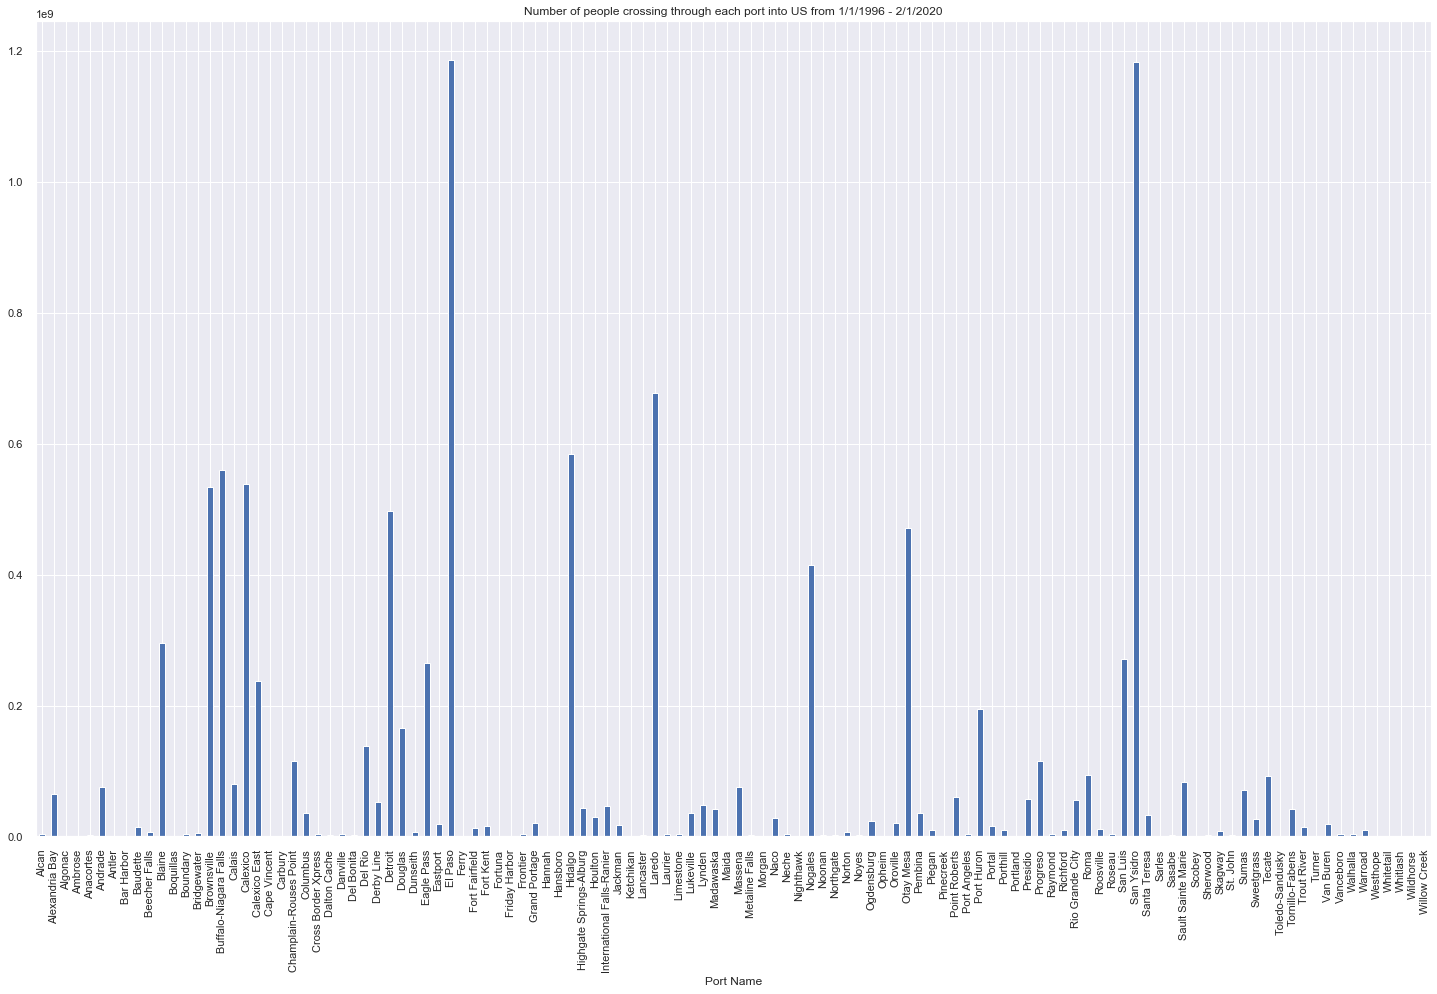

In [61]:
sns.set()
plt.figure(figsize=(25,15))
df.groupby('Port Name').Value.sum().plot.bar()
plt.title('Number of people crossing through each port into US from 1/1/1996 - 2/1/2020')

## 2) State most people cross through 

In [89]:
gb_state = df.groupby('State').Value.sum()
gb_state.sort_values(ascending=False)

State
TX    3747879529
CA    2602572970
AZ     918287879
NY     854042599
MI     775410321
WA     521397911
ME     236781464
VT     118116868
MN      99126985
ND      78600964
NM      68560332
MT      56139436
ID      21833390
AK      14676856
OH           607
Name: Value, dtype: int64

Text(0.5, 1.0, 'Sum of Total People Crossing Border in Each State')

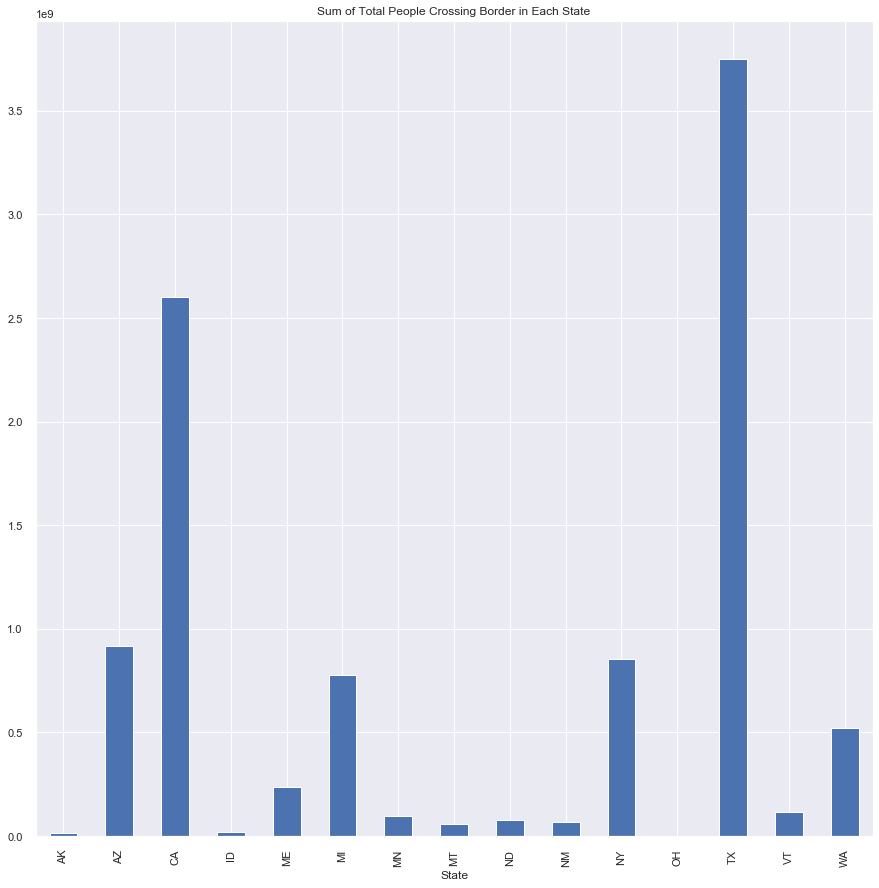

In [101]:
figure(figsize=(15,15))
gb_state.plot.bar()
plt.title('Sum of Total People Crossing Border in Each State')

## 3) Border most used 

Text(0.5, 1.0, 'Number of People Crossing Into US From Canada Border vs Mexico Border')

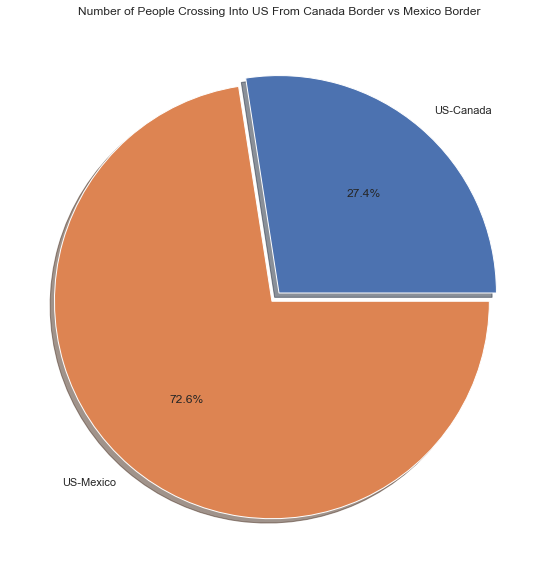

In [85]:
sns.set()
figure(figsize=(10,10))
gb_border = df.groupby('Border').Value.sum()
plt.pie(gb_border, explode=(0,.05), labels = ['US-Canada', 'US-Mexico'], autopct='%1.1f%%', shadow=True)
plt.title('Number of People Crossing Into US From Canada Border vs Mexico Border')

## 4- Is there any pattern in the number of crossings with respect to any season of the year?


In [103]:
df['Date'] = pd.to_datetime(df['Date'])

0        2020-02-01
1        2020-02-01
2        2020-02-01
3        2020-02-01
4        2020-02-01
            ...    
355506   1996-01-01
355507   1996-01-01
355508   1996-01-01
355509   1996-01-01
355510   1996-01-01
Name: Date, Length: 355511, dtype: datetime64[ns]

In [105]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

Text(0.5, 1.0, 'People Crossing Border into US by Month')

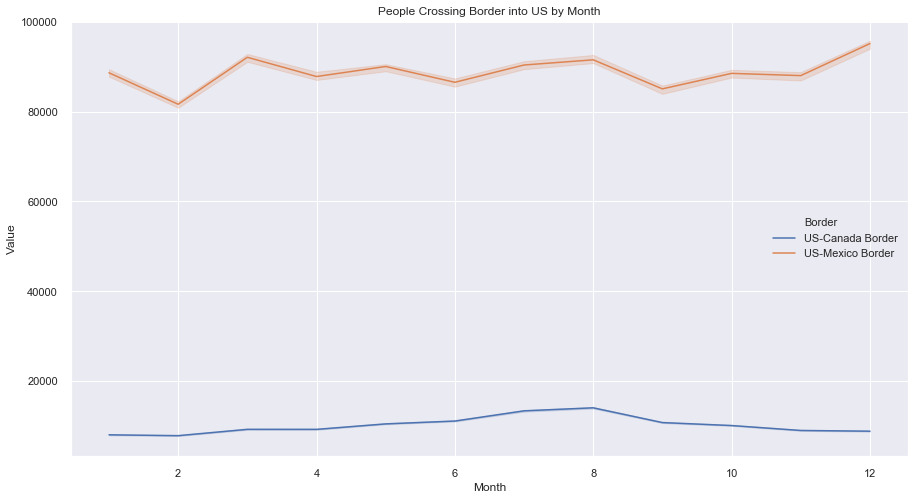

In [117]:
figure(figsize=(15,8))
sns.lineplot(x='Month', y='Value', hue='Border', data=df, ci=20)
plt.title('People Crossing Border into US by Month')

The only noticeable pattern is the both increase in August which may be due to students and coming back home for the start of the school year

## 5) Most used vehicles

Text(0.5, 1, 'Methods of Transportation for Crossing US Border')

<Figure size 1080x576 with 0 Axes>

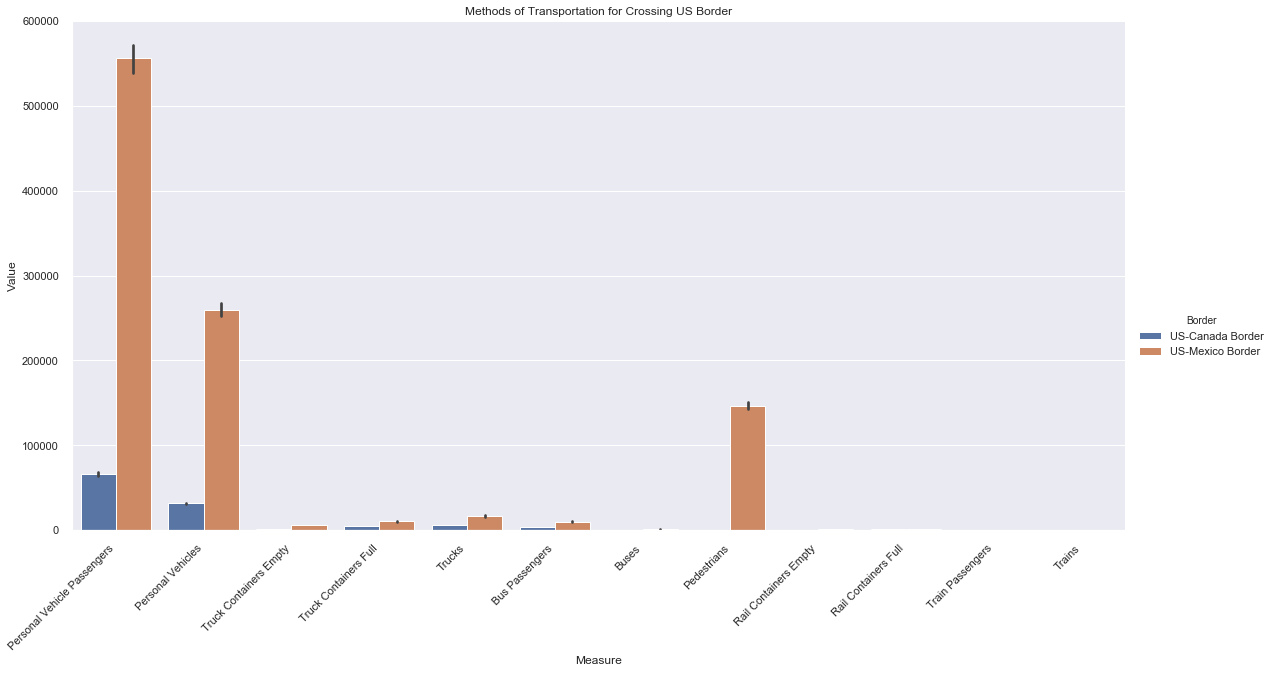

In [125]:
figure(figsize=(15,8))
g = sns.catplot(x='Measure', y='Value', data=df, kind='bar', height=8, aspect=2, hue='Border')
g.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Methods of Transportation for Crossing US Border')